# Harry Potter and the Superior Temporal Gyrus: A representational similarity analysis story

Hanneke Lettinga, Lauren Kuhns, University of Amsterdam, Pattern Analysis 2017


## Abstract
Earlier research suggests that the superior temporal gyrus (STG) is related to several disorders that include emotional problems. In the SharedStates study, the authors discovered that emotion-related sentences were decodable in (among other brain regions) the STG. In the current analysis the SharedStates study dataset will be re-analysed using representational connectivity to see whether the STG is informationally connected to other brain regions. RDMs are created for the STG and all other brain regions, over all subjects. Results suggest that the STG is indeed informationally connected to all other brain regions. Alternative explanations, for example that the correlations are driven by noise, are discussed. 

<div class='alert alert-info'>
**Feedback**: clear!

<br><br>

Argumentation analysis (10%): 7<br><br>
Embedding in literature (5%): 9<br><br>
Implementation analysis (55%): 8<br><br>
Clarity (30%): 9<br><br>
Total: 8.3
</div>

## Introduction
   The superior temporal gyrus (STG) is a major anatomical substrate for speech, language and communication (Rajarethinam, DeQuardo, Nalepa, & Tandon, 2000). The STG is also connected to emotion-related brain areas such as the amygdala, hippocampus, and neocortical association areas in the prefrontal cortex (Bowden, Scott & Tooney, 2008). In prior research, the STG is often associated with disorders like schizophrenia (Bowden et al., 2008; Sun, Maller, Guo & Fitzgerald, 2009) and autism (Adolphs, 2001; Lee et al., 2007; Zilbovicius et al., 2006). These disorders are known for their socially recognizable symptoms (e.g. delusions in schizophrenia and impaired social skills in autism). However, both disorders also share a distorted emotional component. For example, it has been found that people with schizophrenia show less outwardly expression of both negative and positive emotions compared to people without schizophrenia (Kring & Caponigro, 2010). For people with autism, a recent meta-analysis showed that one of the main affective issues is emotion recognition (Uljarevic & Hamilton, 2013). In the SharedStates study, the authors found that the different types of sentences (action, interoceptive, and situational) that are all related to emotion were decodable in (amongst other brain regions) the STG. 
   
   In the current analysis, we will look at whether the STG is informationally connected to other brain regions using representational connectivity. We will include all other brain regions from the Harvard Oxford atlas and look at the most significant ones. However, since the SharedStates study used sentences related to emotion, and the STG is connected to the amygdala and seems to be associated with disorders like schizophrenia and autism, we will pay particular attention to  emotion-related brain areas. To be more precise, we will look at the amygdala, hippocampus, insula, hypothalamus and thalamus.
   
#### Analysis of Choice

   A representational similarity analysis (RSA) is the most appropriate way to approach this research question because we are fundamentally interested in the representation of the emotion conditions in the Left STG and whether this representation is similar in other regions throughout the brain. A machine learning analysis could tell us whether the conditions are identifiable--in other words, if there is enough information in a brain region to classify the condition; however, it cannot tell us anything about the architecture of the representation. Furthermore, a univariate approach could tell us if and where brain regions differentially activate to the conditions ('what' or 'where'), but it doesn't say anything about the representational content (e.g. 'how'). 
   

<div class='alert alert-info'>
**Feedback**: very clear intro. I especially like the last paragraph (analysis of choice). But it would have been nice if you introduced/discussed/explained the concept of representational connectivity a bit more: what does it investigate and how does it work?
</div>

## Current study


## Methods


### Experimental stimuli and procedure
   In total, data from 19 Dutch undergraduate students from the University of Amsterdam will be used in our analyses. Participants completed a self-focused emotion imagery task while in the scanner. During this task, participants were instructed to to imagine performing or experiencing the content of short linguistic cues with negative emotional content. These cues were meant to elicit self-focused processing of action (e.g. “pushing someone away”), interoceptive (e.g. “being out of breath”) or situational information (e.g. “being falsely accused”). All of the cues had the same number of words and characters. 
    
   The task was performed in two runs, with 60 trials each and 20 sentences from each condition per run, for a total of 120 trials. The order of the trials were fully randomized and the task used an event-related design with an inter-trial-interval of two seconds.  


### Pattern estimation and data representation

   The functional and structural data were preprocessed to correct for motion slice and slice timing, and then were spatially smoothed using a 5mm isotropic kernel. Single-trial GLMs were then modeled using a double gamma hemodynamic response function. To estimate our multi-voxel patterns, we used the whole-brain pattern of t-values that were calculated based on beta-values of the single-trial GLMs. 
   To load in our data in a sample-by-voxel array, we created and used a custom Mvp class. Below you can see the code for the creation of the class with descriptions of the class and load function. The resulting Mvp is the pattern of whole-brain t-values in a sample by voxels array. 

In [81]:
class Mvp():
    """ Custom class to load, organize, and process multivoxel MRI patterns. For our purposes, we will only be using
    the initialization and load function, because we will apply the masks using the load_roi_mask function from 
    skbold.utils. This class takes as input a list of paths to nifti-files that represent samples in a pattern analysis. 
    The paths are an attribute of the initialized class. 
    
    Parameters
    ----------
    paths : list
        A list with all the to-be-loaded nifti-files
        
    Attributes
    ----------
    X : numpy-array
        Array of shape [n_samples, n_voxels]"""
    
    def __init__(self, paths):
        
        self.paths = paths
        
        
    def load(self, voxel_dims=(80, 80, 37)):
        
        X = np.zeros((len(self.paths), np.prod(voxel_dims)))

        for i, path in enumerate(self.paths):
    
            X[i, :] = nib.load(path).get_data().ravel()
        
        self.X = X
        
        """The load function loads in the nifti-files using the paths attribute. This creates an X attribute of our
        Mvp class which is a sample-by-features matrix which we will use for our analyses.
        
        Parameters
        ----------
        voxel_dims: the dimensions of the data to be loaded
        
        Attributes
        ----------
        X: The numpy array of shape [n_samples, n_voxels]
        
        """  
    

### Data preprocessing, RDM Creation, and Correlation

   In order to compute the average correlation between the Left STG and all of the 109 other brain regions, we had to create a loop that iterates over subjects, and then in a nested loop, iterate over all brain regions for each subject. Because of this, we have included the preprocessing, Left STG RDM creation, regional RDMs creation and correlation computations inside one loop. To clearly explain the steps we took for each process, we have made comments within the code. Below we will briefly summarize the steps we took for each of the three processes before displaying the code with more detailed description. 

#### Data preprocessing

   For each subject, we loaded in the whole-brain t-values as our pattern. When loading in the masks for each subject, we used the load_roi_mask function which loads in masks in MNI space. Because the tstat files for each subject are in native space, we used each person registration data to warp the ROI masks to native space. 

   Because there is no set standard for how to decide what threshold to use for our mask,
we chose to threshold at 20 for speed of computation (less voxels, so faster to run the analyses). If we had more
time, we would have tried multiple thresholds on a training set to optimize the results and then cross-validated
with a test-set.

  See comments within the loop for a detailed description of this process. 


####  RDM Creation

   For all of our RDMs, we decided a priori to use the correlation distance metric. We chose this metric because it is more sensitive to between-voxel differences compared to other distance metrics. It is more sensitive because it controls for differences in mean activity by subtracting out the mean. 
 
   Because our goal is to examine the informational connectictivity of the left STG with other regions of the brain during emotional language processing, we created our conceptual RDM based on the pattern in the left STG. We then looped over all of the 110 lateralized brain regions for each subject to create asubject-specific RDM for each region. All of the resulting RDMs had the dimensions (120, 120).

   See comments within the loop for a detailed description of this process.

#### Calculating Representational Connectivity 

   To assess the representaitonal conectivity between the left STG and the 110 other brain regions during the task, we used a spearman correlation. We chose a spearman correlation because the dissimilarity matrices violate the assumption of independence, necessitating the use of a non-parametric test. See comments within the nested loop for a more detailed description of the process by which we computed the correlations. 

<div class='alert alert-info'>
**Feedback**: Clear explanation of the steps. 
</div>

In [82]:
"""Here we import all of the necessary packages and functions"""
import os.path as op

import pandas as pd

import numpy as np

import nibabel as nib

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import wilcoxon as wil

from glob import glob

from sklearn.metrics.pairwise import pairwise_distances

from skbold.utils import print_mask_options
from skbold.utils import load_roi_mask

In [83]:
"""Here we create and pre-allocate all of the variables we need for our loop over subjects and masks"""

paths = glob("/home/nipa_1/SharedStates/SELF/sub0*")
"""Compiles the paths to each subjectś folder"""
    
corr_val=np.zeros((110,19))
"""Creates a 2-dimensional array that will hold the correlation coefficients for each brain region (110)
correlated with the left STG for each subject (19). """
    
stg_rdms = np.zeros((19,120,120))
"""Creates a 3D array that will hold 19 subject-specific left STG RDM"""


'Creates a 3D array that will hold 19 subject-specific left STG RDM'

In [128]:
#Loop over subjects and masks begins!

for i, path in enumerate(paths):
    """Below we load in subject-specific tstats and sort them (tstat1, tstat1, tstat2, tstat2, etc.).  """
    tstats = glob(path + "/self*.feat/stats/tstat*")
    tstats_sorted = sorted(tstats, key=lambda x: int(op.basename(x).split('.')[0].split('tstat')[-1]))

    """Below we load in subject-specific left STG mask for our representational RDM. To warp the masks into
    subject-specific native space, we first created a path to the reg directory of each subject.
    The path is then used as input to the reg_dir argument in the load_roi_mask function to register the ROI to 
    subject-specific native space."""
    reg_dir_sub = path + '/self1.feat/reg' 
    
    mask_stg, mask_name_stg = load_roi_mask(roi_name='Superior Temporal Gyrus, posterior division', 
                                atlas_name='HarvardOxford-Cortical', lateralized=True,
                                which_hemifield='left', threshold=20, reg_dir=reg_dir_sub)
    
    """Below we load in the subject-specific pattern (variable: subs) using the custom Mvp class described above."""
    
    subs = Mvp(tstats_sorted) 
    subs.load() 
    
    """Below we create the subject´s left STG RDM. The steps are explain with inline comments. """

    stg_indexed_X = subs.X[:, mask_stg.ravel()] 
  
    stg_rdm=pairwise_distances(stg_indexed_X, metric="correlation")
    stg_rdms[i,:,:]=stg_rdm #stores the subject specific RDM
    stg_rdm_triu=np.triu_indices(len(stg_rdm), k=1)
    
    stg_rdm=stg_rdm[stg_rdm_triu]
    print stg_rdm.shape
    
    
    """Here we load in all of the subject-specific masks for all bilateral brain regions. Once again we use the reg_dir
    argument to warp the masks to the native space of the subject and we use a threshold of 20. """
    
    masks, mask_names = load_roi_mask(roi_name='all', atlas_name='HarvardOxford-All', lateralized=True, 
                                      threshold=20, reg_dir=reg_dir_sub)
    
    """Here we´ve created another loop in order to loop over all of the ROIs per subject. 
    Within this loop, we create a regional RDM for each subject-specific ROI. Then we correlate the subject-specific
    STG RDM with their 110 regional RDMs. All of these correlations are allocated to the array corr_val (shape 110,19)
    which we initialized outside of the subject loop"""
    for j, mask in enumerate(masks):
        
        #Indexes the subject´s pattern with the mask of (j) ROI; Indexed_X is the pattern in (j) ROI only
        indexed_X = subs.X[:, masks[j].ravel()]
        
        region_rdm=pairwise_distances(indexed_X, metric="correlation")
        region_rdm_triu = np.triu_indices(len(region_rdm), k=1)
        region_rdm=region_rdm[region_rdm_triu]

        cor = spearmanr(stg_rdm, region_rdm)
        
        corr=cor[0]
        
        corr_val[j,i]=corr
        print corr_val[j,i]
        

(7140,)
0.615740642323
0.269818988612
0.509888087263
0.567471882925
0.346152187056
0.342027339507
0.197329041071
0.375581670614
0.607920192652
0.250338472675
0.414501274117
0.310117416534
0.232330231161
0.217871320637
0.184124167629
0.306400516849
0.418317799319
0.370566835615
0.316259740382
0.492503225975
0.390948441747
0.598561194
0.333373394023
0.446939669324
0.357159260096
0.25023055381
0.283639488083
0.666807938524
0.15356455373
0.160523539932
0.317240268945
0.289631652177
0.406976512607
0.333090192122
0.389912042128
0.558836317012
0.280824259184
0.570673899599
0.348291761827
0.450333716217
1.0
0.383104737164
0.334622920155
0.39090361139
0.115618899192
0.221002287997
0.354206036138
0.312414533481
0.633131456264
0.317671233661
0.441251052523
0.570267316131
0.387544365599
0.242568469613
0.201696178323
0.28329900639
0.525273568137
0.24583272575
0.28363027695
0.349141599554
0.223551389348
0.115341285423
0.174655731164
0.276655658428
0.20392275702
0.436765789423
0.185356337898
0.488656

<div class='alert alert-info'>
**Feedback**: Code looks good. 
</div>

### Statistical Evaluation of Representational Connectivity

  After calculating the correlation between the Left STG and each of the 110 regions for all 19 subjects, we stored the correlation values in an 2D array (110, 19). In order to determine whether each brain region is significantly correlated with the STG on average across subjects, we ran a one-sample t-test comparing the average correlation of each brain region to zero--the expected value if the region were not connected to the left STG. We then stored the resulting p-value for each region in the 1D pvalue array. 


In [69]:
"""Here we have created a loop to compute a t-test to compare each regional correlation against zero and compute 
the corresponding p-value. This will tell us which regions are signficantly correlated to the left-STG across subjects."""

##One sample t-test
pvalue=[]
for i in range(corr_val.shape[0]):
    pval=stats.ttest_1samp(corr_val[i,:], 0)[1]
    pvalue.append(pval)



### Results of Representational Connectivity Analysis

To control for multiple comparisons, we used a bonferroni correction (.05/number of tests). Our resulting p-value is .00045. Using this p-value, all of the regions are significantly correlated with the Left STG. The resulting p-values are provided below in ascending order.

In [68]:
df=pd.Series(pvalue, index=mask_names)
df_ordered=df.order(na_last=None, ascending=True, kind="quicksort", na_position="last", inplace=False)
print df_ordered

                     

True
Left Superior Temporal Gyrus, posterior division       0.000000e+00
Left Supramarginal Gyrus, posterior division           1.623932e-16
Right Middle Temporal Gyrus, temporooccipital part     2.221494e-16
Right Superior Temporal Gyrus, posterior division      5.834356e-16
Left Middle Temporal Gyrus, posterior division         6.591037e-16
Left Middle Temporal Gyrus, temporooccipital part      2.508528e-15
Left Inferior Frontal Gyrus, pars opercularis          2.913337e-15
Left Superior Frontal Gyrus                            6.909879e-15
Right Inferior Frontal Gyrus, pars triangularis        8.603633e-15
Left Planum Temporale                                  9.799399e-15
Left Inferior Frontal Gyrus, pars triangularis         1.181082e-14
Left Central Opercular Cortex                          2.551986e-14
Left Insular Cortex                                    2.919440e-14
Right Middle Temporal Gyrus, posterior division        3.056500e-14
Left Frontal Orbital Cortex                

<div class='alert alert-info'>
**Feedback**: Nice to see you used Pandas to organize your results - this definitely makes it more organized. 
</div>

### Follow-up Analyses

Surprisingly, our results suggest that all 109 brain regions are (highly) signifcantly representationally connected to the Left STG. Although this result is not impossible, it does suggest that we might be picking up on correlated noise, as opposed to correlated signal. The representational connectivity analysis that we implemented above does not allow us to differentiate between these two possibilites. However, we conducted a follow-up test to see whether the the three experimental conditions (action, interoceptive, situational) are in fact differentially represented in the Left-STG. If our conceptual model is significantly correlated to activity in the left-STG it would at least tell us that there is signal in this area (and not just noise). 

In [122]:
"""Here we create a conceptual model (within our subject loop) to test against the Left STG Brain RDM for each subject
to assess whether the three conditions are distinct in an RSA analysis"""

brain_rdms_conc = np.zeros((120*(120-1)/2, 19))


def make_conceptual_rdm(y):
    rdm = np.vstack([y != y_tmp for y_tmp in y])
    return rdm.astype(int)

corr_conceptual=[]

for i, path in enumerate(paths):
    
    tstats = glob(path + "/self*.feat/stats/tstat*")
    tstats_sorted = sorted(tstats, key=lambda x: int(op.basename(x).split('.')[0].split('tstat')[-1]))

    reg_dir_sub = path + '/self1.feat/reg' 
    
    mask_stg, mask_name_stg = load_roi_mask(roi_name='Superior Temporal Gyrus, posterior division', 
                                atlas_name='HarvardOxford-Cortical', lateralized=True,
                                which_hemifield='left', threshold=20, reg_dir=reg_dir_sub)    
    
    subs_conc=Mvp(tstats_sorted)
    subs_conc.load()
    subs_conc_indexed=subs_conc.X[:, mask_stg.ravel()] #applying the mask

    labels = np.loadtxt(path + '/sample_labels.txt',dtype=str)
    labels = np.array(labels)
    conc_rdm = make_conceptual_rdm(labels)
        
    brain_rdm_conc=pairwise_distances(subs_conc_indexed, metric='correlation')
    
    conc_rdm_triu = np.triu_indices(len(conc_rdm), k=1)
    flat_conc_rdm=conc_rdm[conc_rdm_triu]
    
    brain_rdm_triu_conc = np.triu_indices(len(brain_rdm_conc), k=1)    
    brain_rdms_conc[:,i]=brain_rdm_conc[brain_rdm_triu_conc]
    
    cor_conc=spearmanr(flat_conc_rdm, brain_rdms_conc[:,i])
    cor_conc=cor_conc[0]
    corr_conceptual.append(cor_conc)
    


### Statistical Evaluation of Conceptual RDM

  After calculating the correlation between the Left STG and and the conceptual model for all 19 subjects, we stored the correlation values in an 1D array. In order to determine whether the conceptual model significantly correlates with the Left-STG representation of the conditions, we ran a wilcoxon signed rank test. The results indicate that the conceptual model does correlate with the representation of the conditions in the left STG across subjects (Average correlation=.076, p<.01). This is what we expected given that a Machine Learning algorithm was able to differentiate between the three conditions in the Left STG, and confirms that we can model signal with RSA so that we can continue our analysis by investigating the representational connectivity of the left STG to all other brain regions. 
   

In [124]:
"""Here we test whether the correlation between the conceptual RDM and Left STG RDM for each subject is significantly
above zero."""
mean=np.mean(corr_conceptual)
print mean


wil(corr_conceptual)

0.0758934530121
19


WilcoxonResult(statistic=0.0, pvalue=0.00013183388898283329)

###  RDM Visualization
Below we have created visualizations of our RDMs. First, we visualized the Left STG RDM and one regional RDM (in this case, the Left Amygdala) for a single subject as an example of our representational connectivity analysis.

We have also visualized the conceptual RDM and the average Left STG RDM across all subjects. 

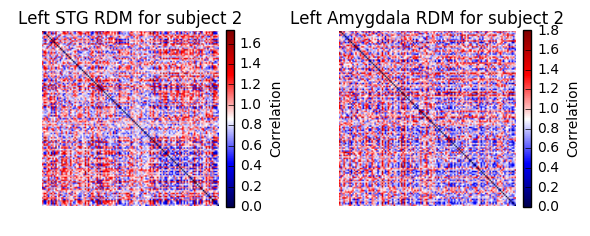

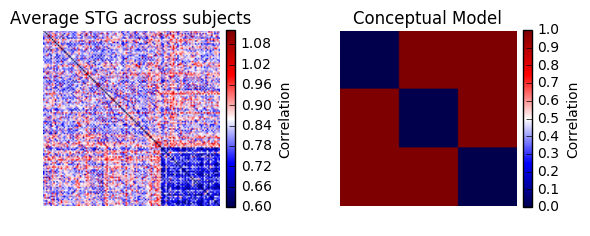

In [130]:
#creating RDMs for subject 2 (load in the paths specific for subject 2)
path_2 = glob('/home/nipa_2/SharedStates/SELF/sub002/*.feat/stats/tstat*.nii.gz')
tstats_sorted_2 = sorted(path_2, key=lambda x: int(op.basename(x).split('.')[0].split('tstat')[-1]))
sub002 = Mvp(paths=tstats_sorted_2)
sub002.load(voxel_dims=(80, 80, 37))
reg_dir_sub_2 = '/home/nipa_2/SharedStates/SELF/sub002/self1.feat/reg'

# Create STG mask for subject 2
mask_stg_2, mask_name_stg_2 = load_roi_mask(roi_name='Superior Temporal Gyrus, posterior division', atlas_name='HarvardOxford-Cortical', lateralized=True,
                                which_hemifield='left', threshold=20, reg_dir=reg_dir_sub_2)
stg_indexed_2 = sub002.X[:, mask_stg_2.ravel()]

#Create STG RDM for subject 2
stg_rdm_sub2=pairwise_distances(stg_indexed_2, metric="correlation")

#And now, for the amygdala:
#Create amygdala mask for subject 2
mask_amy_2, mask_name_amy_2 = load_roi_mask(roi_name='Amygdala', atlas_name='HarvardOxford-Subcortical', lateralized=True,
                                             which_hemifield = 'left', threshold=20, reg_dir=reg_dir_sub_2)
amy_indexed_2 = sub002.X[:, mask_amy_2.ravel()]

#Create amygdala RDM for subject 2
amy_rdm_sub2=pairwise_distances(amy_indexed_2, metric="correlation")

#Plot RDM STG
plt.subplot(1, 2, 1)

plt.title('Left STG RDM for subject 2')
plt.imshow(stg_rdm_sub2, cmap='seismic')
plt.colorbar(label='Correlation', fraction=0.046, pad=0.04)
plt.axis('off')

#Plot RDM amygdala
plt.subplot(1, 2, 2)
#plt.figure(figsize=(6, 6))
plt.title('Left Amygdala RDM for subject 2')
plt.imshow(amy_rdm_sub2, cmap='seismic')
plt.colorbar(label='Correlation', fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.show()


avg_stg_rdm=np.mean(stg_rdms, axis=0)
#Plot Average RDM STG
plt.subplot(1, 2, 1)
plt.title('Average STG across subjects')
plt.imshow(avg_stg_rdm, cmap='seismic', vmin=.6)
plt.colorbar(label='Correlation', fraction=0.046, pad=0.04)
plt.axis('off')

plt.subplot(1, 2, 2)
#plt.figure(figsize=(6, 6))
plt.title('Conceptual Model')
plt.imshow(conc_rdm, cmap='seismic')
plt.colorbar(label='Correlation', fraction=0.046, pad=0.04)
plt.axis('off')
plt.tight_layout()
plt.show()



<div class='alert alert-info'>
**Feedback**: Great visualization. 
</div>

## Discussion & conclusions
*In this section(s), interpret your results. What do they mean? Are there potential confounds? What are the limitations? What would you do if you could redo the experiment (or had more time)?*


In the current analysis, we tested whether the pattern of activity in the STG is informationally connected to other brain regions. All the correlations were significant (even after controlling for multiple comparisons with a conservative Bonferroni correction), which suggests that the STG is informationally connected to all other brain regions - including the emotion-related brain regions (amygdala, hippocampus, insula, hypothalamus and thalamus). It is not surprising that the STG is connected to numerous other brain regions, since it plays a major role in auditory and language processing. However, the fact that all correlations are significant may be an indication that something went wrong during data collection or analysis. One explanation of the current results, is that all correlations could have been driven by noise and that we did not measure true signal at all in the STG. To check whether this was the case, we tested a conceptual model against the observed pattern in the STG. This test indicated that indeed signal was measured, and that the STG represents the three conditions distinctly. Another way of controlling for noise in this analysis would have been to divide the subjects in subsets, and calculate the correlation for each subset. In fact, we could have calculated the correlation for the STG pattern of subject X to all other subjects and repeat that for all subjects (a sort of K-fold cross validation, but over subjects). Next, we could have averaged over all the remaining correlations to control for noise.

When we look at the significant correlations in ascending order, some spatial component can be noticed. The most significant areas seem to be spatially close to the STG. This finding can be an indication of either highly correlated noise in around this area, or that the representational pattern propagates throughout this region. However, with the current analysis we cannot make a clear distinction between these two possibilities.

To sum up, all the correlations came up significant which suggests that the STG is informationally connected to all other brain areas. An alternative explanation could be that correlated noise is driving the correlations. A way to counter this problem is discussed, but implementing it was beyond the scope of this assignment. Because of this, we cannot make any valid conclusions on the representational connectivity between the left STG and other brain regions--including the emotional regions we were initially interestsed in. 

###### The final alternative explanation is that he-who-must-not-be-named could have used dark magic to sabotage our code.


<div class='alert alert-info'>
**Feedback**: Good discussion, but I miss a short explanation on why the STG would be informationally connected to the rest of the brain in this task (i.e. because it was a task involving - emotional - sentences!). Also, what type of noise do you think could have driven these results? And why does calculating representational connectivity across subjects control for this? And why could spatially close regions reflect noise rather than signal? (Think about the coarseness of the BOLD-signal, motion, registration/warping issues.) You definitely describe the problem correctly, but you could have gone into slightly more detail on *what* types of noise could be reflected in the signal and *why* this could account for the observed results.
</div>

<div class='alert alert-warning'>
By the way, did you know some people actually studied ['the brain on harry potter?'](http://www.hearingreview.com/2014/12/harry-potter-book-helps-scientists-understand-brain-processes/)<br>
<img src=http://cdn.hearingreview.com/hearingr/2014/12/CMU-BrainImagingFigure4.png>
</div>

### Reference List

Adolphs, R. (2001). The neurobiology of social cognition. Current opinion in neurobiology, 11(2), 231-239.

Bowden, N. A., Scott, R. J., & Tooney, P. A. (2008). Altered gene expression in the superior temporal gyrus in schizophrenia. Bmc Genomics, 9(1), 199.Rajarethinam, R. P., DeQuardo, J. R., Nalepa, R., & 

Kring, A. M., & Caponigro, J. M. (2010). Emotion in schizophrenia where feeling meets thinking. Current directions in psychological science, 19(4), 255-259.

Tandon, R. (2000). Superior temporal gyrus in schizophrenia: a volumetric magnetic resonance imaging study. Schizophrenia research, 41(2), 303-312.

Lee, J. E., Bigler, E. D., Alexander, A. L., Lazar, M., DuBray, M. B., Chung, M. K., ... & Lu, J. (2007). Diffusion tensor imaging of white matter in the superior temporal gyrus and temporal stem in autism. Neuroscience letters, 424(2), 127-132.

Oosterwijk, S., Snoek, L., Rotteveel, M., Barrett, L. F., & Scholte, H. S. (in press). Shared states: Using MVPA to test neural overlap between self-focused emotion imagery and other-focused emotion understanding. Retrieved from https://github.com/lukassnoek/SharedStates/blob/master/sharedstates_fullarticle_draft.pdf on 26-4-2017

Sun, J., Maller, J. J., Guo, L., & Fitzgerald, P. B. (2009). Superior temporal gyrus volume change in schizophrenia: a review on region of interest volumetric studies. Brain research reviews, 61(1), 14-32.

Uljarevic, M., & Hamilton, A. (2013). Recognition of emotions in autism: a formal meta-analysis. Journal of autism and developmental disorders, 43(7), 1517-1526.

Zilbovicius, M., Meresse, I., Chabane, N., Brunelle, F., Samson, Y., & Boddaert, N. (2006). Autism, the superior temporal sulcus and social perception. Trends in neurosciences, 29(7), 359-366.
